In [1]:
!pip3 install matplotlib

DWF Version: 3.16.3
Opening first device
Preparing to read sample...
Generating sine wave...
   waiting to finish
Recording finished


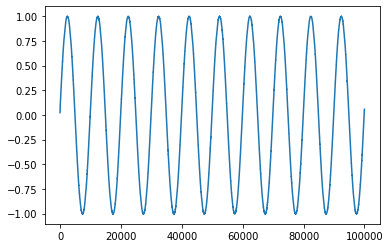

AttributeError: module 'dwf' has no attribute 'ao'

In [1]:
import dwf
import time
import matplotlib.pyplot as plt

#print DWF version
print("DWF Version: " + dwf.FDwfGetVersion())

#constants
HZ_ACQ = 10e3
N_SAMPLES = 100000

#open device
print("Opening first device")
dwf_ao = dwf.DwfAnalogOut()

print("Preparing to read sample...")

print("Generating sine wave...")
dwf_ao.nodeEnableSet(0, dwf_ao.NODE.CARRIER, True)
dwf_ao.nodeFunctionSet(0, dwf_ao.NODE.CARRIER, dwf_ao.FUNC.SINE)
dwf_ao.nodeFrequencySet(0, dwf_ao.NODE.CARRIER, 1.0) # 1hz
dwf_ao.nodeAmplitudeSet(0, dwf_ao.NODE.CARRIER, 1.0) # 2v amplitude
dwf_ao.configure(0, True)

#set up acquisition
dwf_ai = dwf.DwfAnalogIn(dwf_ao)
dwf_ai.channelEnableSet(0, True)
dwf_ai.channelRangeSet(0, 5.0)
dwf_ai.acquisitionModeSet(dwf_ai.ACQMODE.RECORD)
dwf_ai.frequencySet(HZ_ACQ)
dwf_ai.recordLengthSet(N_SAMPLES / HZ_ACQ)

#wait at least 2 seconds for the offset to stabilize
time.sleep(5)

#begin acquisition
dwf_ai.configure(False, True)
print("   waiting to finish")

rgdSamples = []
cSamples = 0
fLost = False
fCorrupted = False
while cSamples < N_SAMPLES:
    sts = dwf_ai.status(True)
    if cSamples == 0 and sts in (dwf_ai.STATE.CONFIG,
                                 dwf_ai.STATE.PREFILL,
                                 dwf_ai.STATE.ARMED):
        # Acquisition not yet started.
        continue

    cAvailable, cLost, cCorrupted = dwf_ai.statusRecord()
    cSamples += cLost
        
    if cLost > 0:
        fLost = True
    if cCorrupted > 0:
        fCorrupted = True
    if cAvailable == 0:
        continue
    if cSamples + cAvailable > N_SAMPLES:
        cAvailable = N_SAMPLES - cSamples
    
    # get samples
    rgdSamples.extend(dwf_ai.statusData(0, cAvailable))
    cSamples += cAvailable

print("Recording finished")
if fLost:
    print("Samples were lost! Reduce frequency")
if cCorrupted:
    print("Samples could be corrupted! Reduce frequency")

with open("record.csv", "w") as f:
    for v in rgdSamples:
        f.write("%s\n" % v)

plt.plot(rgdSamples)
plt.show()

dwf_ai.close()
dwf_ao.close()

DWF Version: 3.16.3
Opening first device...
Generating sine wave...
Play sine wave for 10 seconds...
   waiting to finish
Recording finished


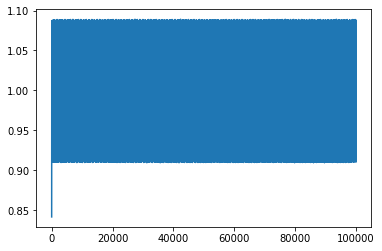

In [ ]:
import dwf
import time
import matplotlib.pyplot as plt

#declare constant
CHANNEL = 0
HZ_ACQ = 10e3
N_SAMPLES = 100000

#print DWF version
print("DWF Version: " + dwf.FDwfGetVersion())

#open device
print("Opening first device...")
dwf_ao = dwf.DwfAnalogOut()

print("Generating sine wave...")
dwf_ao.nodeEnableSet(0, dwf_ao.NODE.CARRIER, True)
dwf_ao.nodeFunctionSet(0, dwf_ao.NODE.CARRIER, dwf_ao.FUNC.SINE)
dwf_ao.nodeFrequencySet(0, dwf_ao.NODE.CARRIER, 10e3)
dwf_ao.nodeAmplitudeSet(0, dwf_ao.NODE.CARRIER, 1.0)
dwf_ao.nodeOffsetSet(0, dwf_ao.NODE.CARRIER, 1.0)

dwf_ao.nodeEnableSet(0, dwf_ao.NODE.FM, True)
dwf_ao.nodeFunctionSet(0, dwf_ao.NODE.FM, dwf_ao.FUNC.RAMP_UP)
dwf_ao.nodeFrequencySet(0, dwf_ao.NODE.FM, 1e3)
dwf_ao.nodeModulationSet(0, dwf_ao.NODE.FM, 10.0) # modulation (%)
dwf_ao.nodeOffsetSet(0, dwf_ao.NODE.FM, 0.0)      # offset (%)

print("Play sine wave for 10 seconds...")
dwf_ao.configure(0, True)

#set up acquisition
dwf_ai = dwf.DwfAnalogIn(dwf_ao)
dwf_ai.channelEnableSet(0, True)
dwf_ai.channelRangeSet(0, 5.0)
dwf_ai.acquisitionModeSet(dwf_ai.ACQMODE.RECORD)
dwf_ai.frequencySet(HZ_ACQ)
dwf_ai.recordLengthSet(N_SAMPLES / HZ_ACQ)

#wait at least 2 seconds for the offset to stabilize
time.sleep(5)

#begin acquisition
dwf_ai.configure(False, True)
print("   waiting to finish")

rgdSamples = []
cSamples = 0
fLost = False
fCorrupted = False
while cSamples < N_SAMPLES:
    sts = dwf_ai.status(True)
    if cSamples == 0 and sts in (dwf_ai.STATE.CONFIG,
                                 dwf_ai.STATE.PREFILL,
                                 dwf_ai.STATE.ARMED):
        # Acquisition not yet started.
        continue

    cAvailable, cLost, cCorrupted = dwf_ai.statusRecord()
    cSamples += cLost
        
    if cLost > 0:
        fLost = True
    if cCorrupted > 0:
        fCorrupted = True
    if cAvailable == 0:
        continue
    if cSamples + cAvailable > N_SAMPLES:
        cAvailable = N_SAMPLES - cSamples
    
    # get samples
    rgdSamples.extend(dwf_ai.statusData(0, cAvailable))
    cSamples += cAvailable

print("Recording finished")
if fLost:
    print("Samples were lost! Reduce frequency")
if cCorrupted:
    print("Samples could be corrupted! Reduce frequency")

with open("record.csv", "w") as f:
    for v in rgdSamples:
        f.write("%s\n" % v)

plt.plot(rgdSamples)
plt.show()

dwf_ai.close()
dwf_ao.close()



